# ```pirel``` Tutorial : ```modifiers```

In this tutorial I will show you how to add features to ```pirel.pcells``` classes.

In fact, the functions in ```pirel.modifiers``` return new classes with extended functionality.

In [2]:
import pirel.pcells as pc
import pirel.modifiers as pm

For example, let's say that we need pads at the top and at the bottom of an ```pc.iDT``` device.

We can combine the ```pc.IDT``` class and the ```pc.Pad``` class with the decorator ```pm.addPad``` .

Here is what to do:

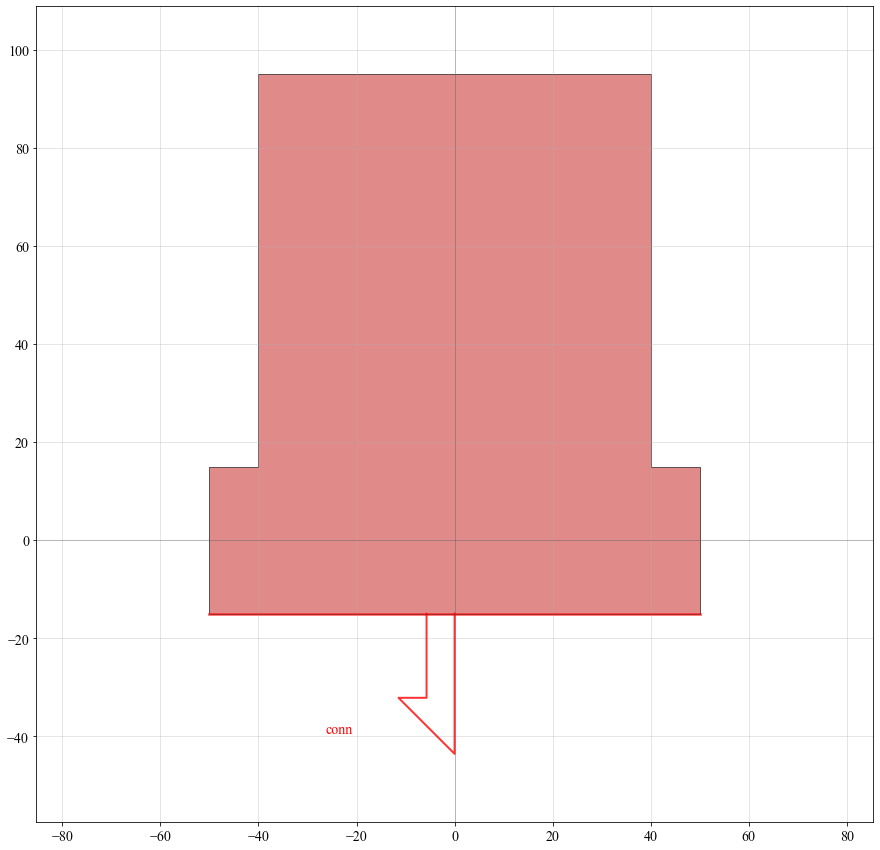

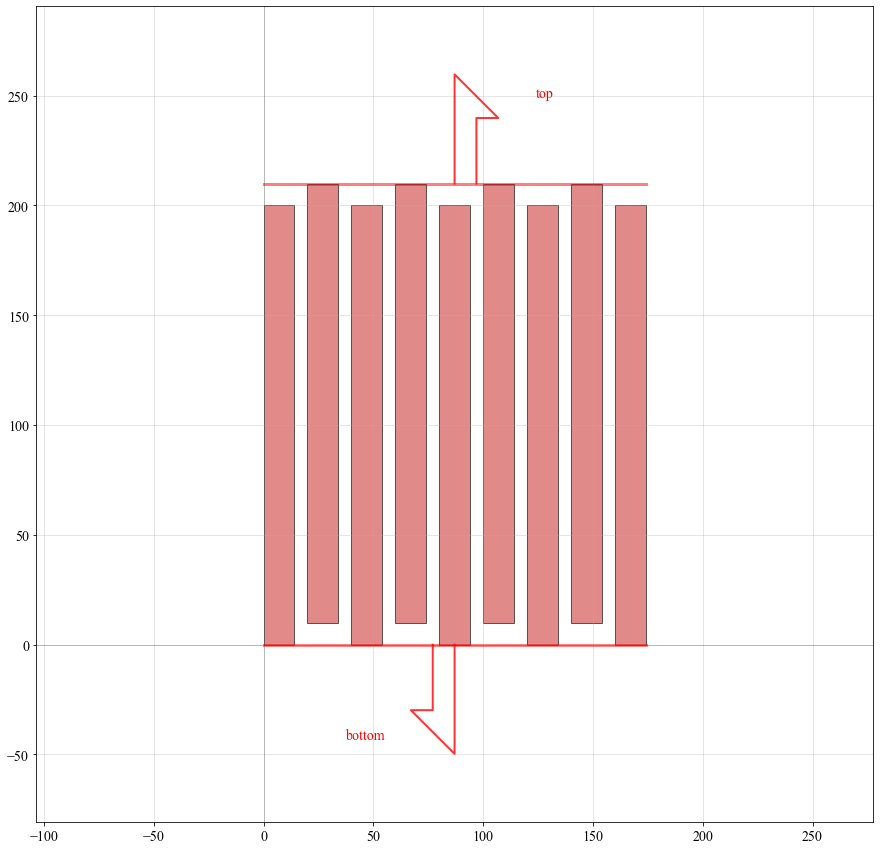

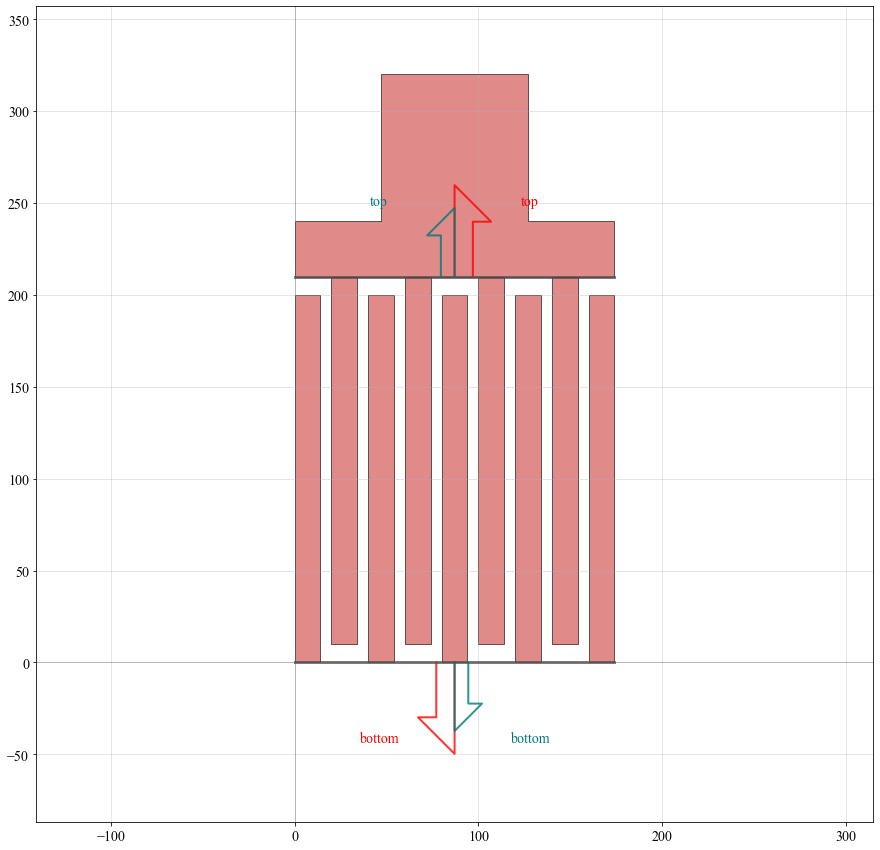

In [4]:
simple_idt=pc.IDT()

simple_pad=pc.Pad()

padidt_class=pm.addPad(pc.IDT,pad=pc.Pad,side='top')

idt_wpad=padidt_class(name='NewIdt instance')

simple_pad.view()

simple_idt.view()

idt_wpad.view()

note that ```pm.addPad``` takes as class as input, and returns a class as output ( These functions are called *class factories* )

```top``` specifies that the resulting class will have ```Via``` at the top ```phidl.Port```.

we can use ```addPad``` with a variety of pad pcells : ```pc.ViaInPad``` will make sure we have a ```pc.Via``` in the middle of the ```pc.Pad```.

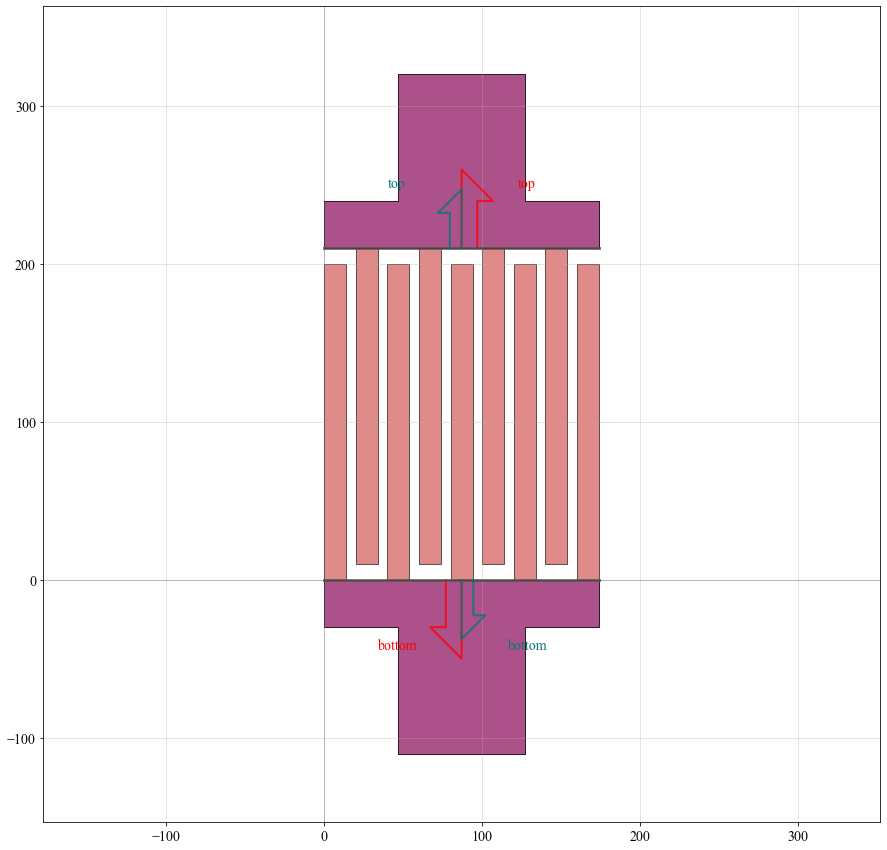

In [5]:
idt_wvia_tb_class=pm.addPad(pc.IDT,pad=pc.ViaInPad,side=('top','bottom')) 

idt_wvia_tb=idt_wvia_tb_class(name='TopBottomVia Instance')

idt_wvia_tb.view()

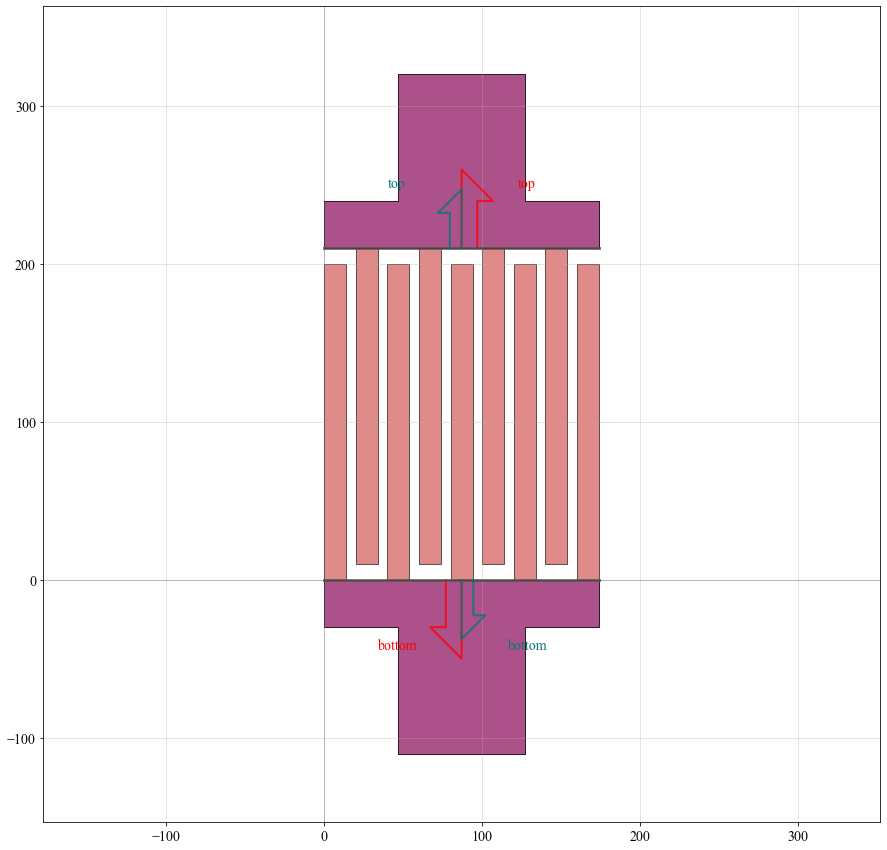

In [6]:
idt_wvia_tb.pad.via.shape='square'
idt_wvia_tb.pad.via.size=50

idt_wvia_tb.view()

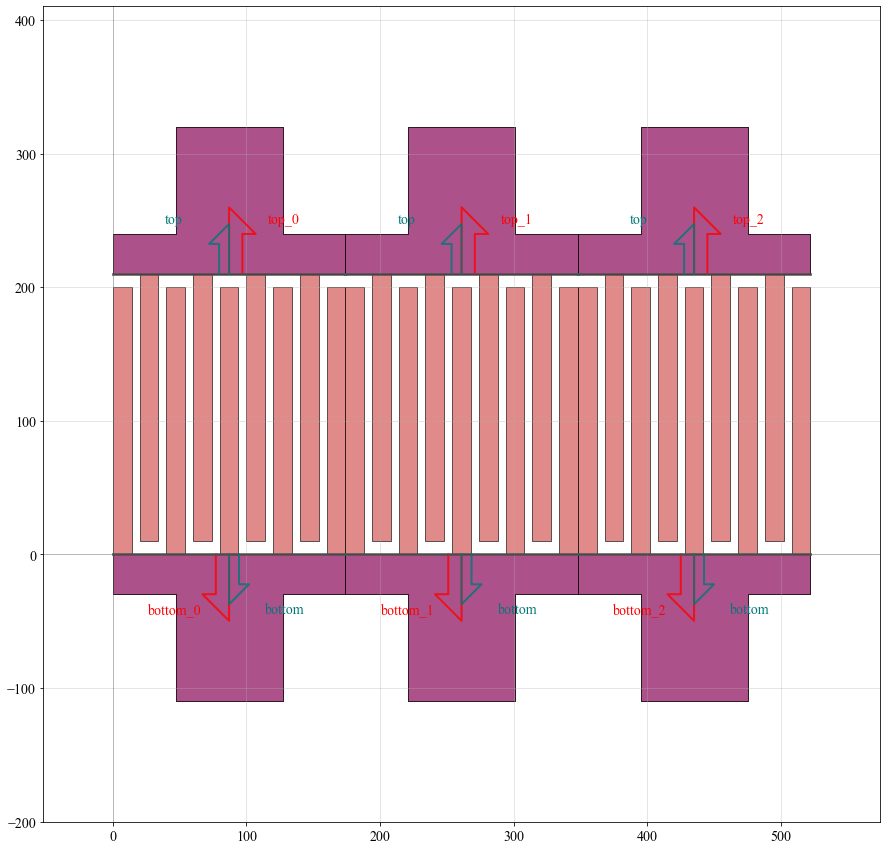

In [8]:
idt_wvia_warray_class=pm.makeArray(idt_wvia_tb_class,3)

idt_wvia_warray=idt_wvia_warray_class()

idt_wvia_warray.set_params(idt_wvia_tb.get_params())

idt_wvia_warray.view()

Another example of useful ```modifiers``` is ```pm.array``` , which has a sort of obvious effect...

In the previous example, note how we passed parameters from a cell to another using ```set_params``` and ```get_params```.

Because of how these factories are designed, all the classes in ```pcells``` can be expanded with ```modifiers``` independently:

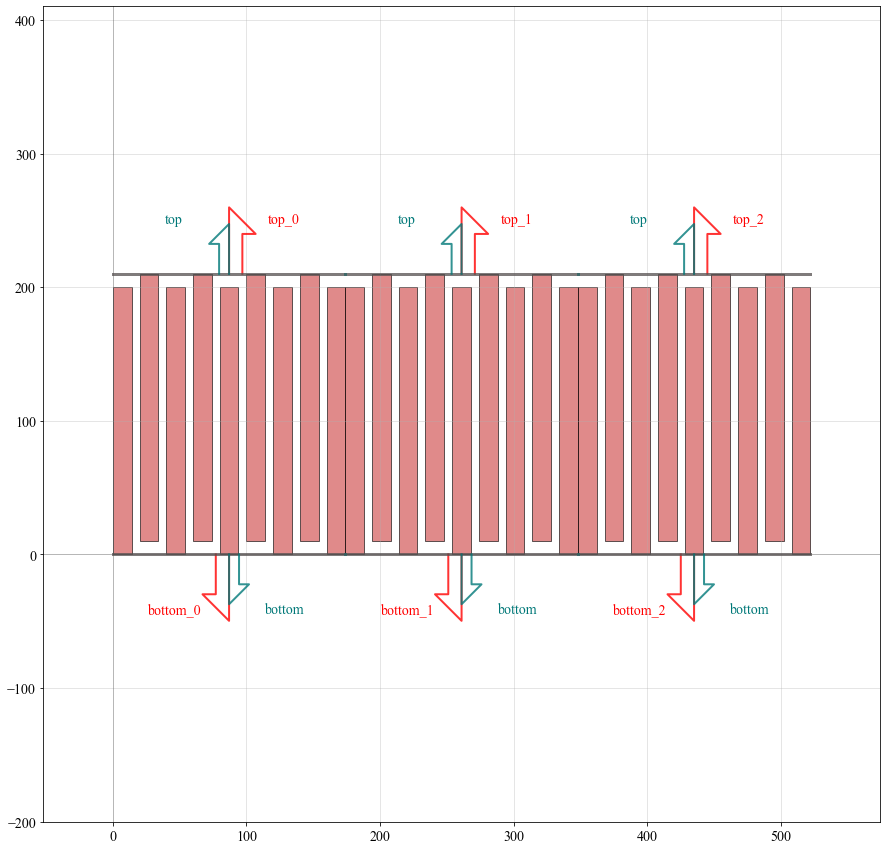

In [9]:
idt_warray=pm.makeArray(pc.IDT,3)

idt_warray().view()

by creating new classes, more complex classes are created: they inherit more parameters that are controllable in the same way of all the other ```pcells```.

In [10]:
complex_cell=idt_wvia_warray_class(name='Complex')

pars=complex_cell.get_params()

complex_cell

PadViaName                                              ComplexPadVia
PadViaShape                                                    square
PadViaSize                                                         20
PadName                                                    ComplexPad
PadSize                                                          80.0
PadDistance                                                      30.0
PadPort             Port (name top, midpoint [50. 50.], width 100,...
Name                                                          Complex
Length                                                          200.0
Pitch                                                            20.0
YOffset                                                          10.0
Coverage                                                          0.7
N                                                                   4
ActiveAreaMargin                                                  0.5
NBlocks             

While the *parent* class ```pc.IDT``` does not have any via-related attributes, ```idt_wvia_warray``` has all the parameters needed to control the pads and ,within the pad component, the vias.

In fact,  ```idt_wvia_warray``` has all parameters of ```pc.IDT```, ```pc.ViaInPad``` and a parameter inherited by ```array``` (```NBlocks```)

To get the components of ```idt_wvia_warray``` you can call ```get_components()```:

In [11]:
idt_wvia_warray.get_components()

{'Pad': pirel.pcells.ViaInPad}

In [12]:
pc.ViaInPad()

ViaName                                            defaultVia
ViaShape                                               square
ViaSize                                                    20
Name                                                  default
Size                                                     80.0
Distance                                                 30.0
Port        Port (name top, midpoint [50. 50.], width 100,...
Type                                                 ViaInPad

to get help on how ```ViaInPad``` works,you can always ***type ```help(pcells.Via)```!***

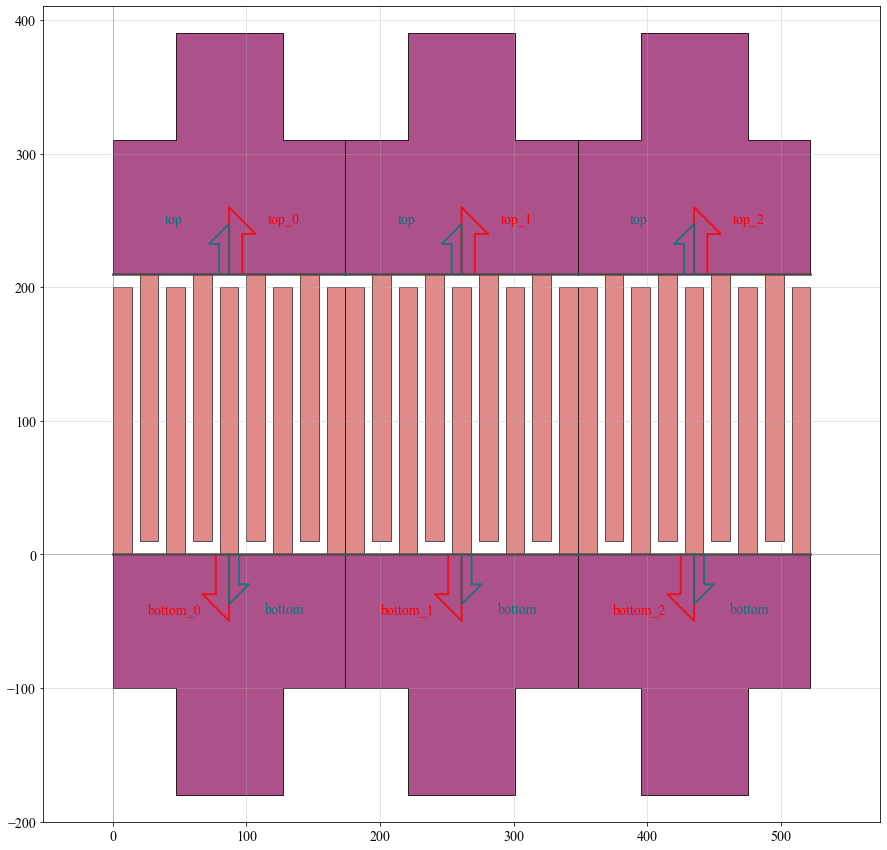

In [13]:
pars['PadViaShape']='square'

pars['PadViaSize']=50

pars['PadDistance']=100

complex_cell.set_params(pars)

complex_cell.view()

We can do these *composition* operation on any ```pcells``` (for example, ```pc.FBERes```)

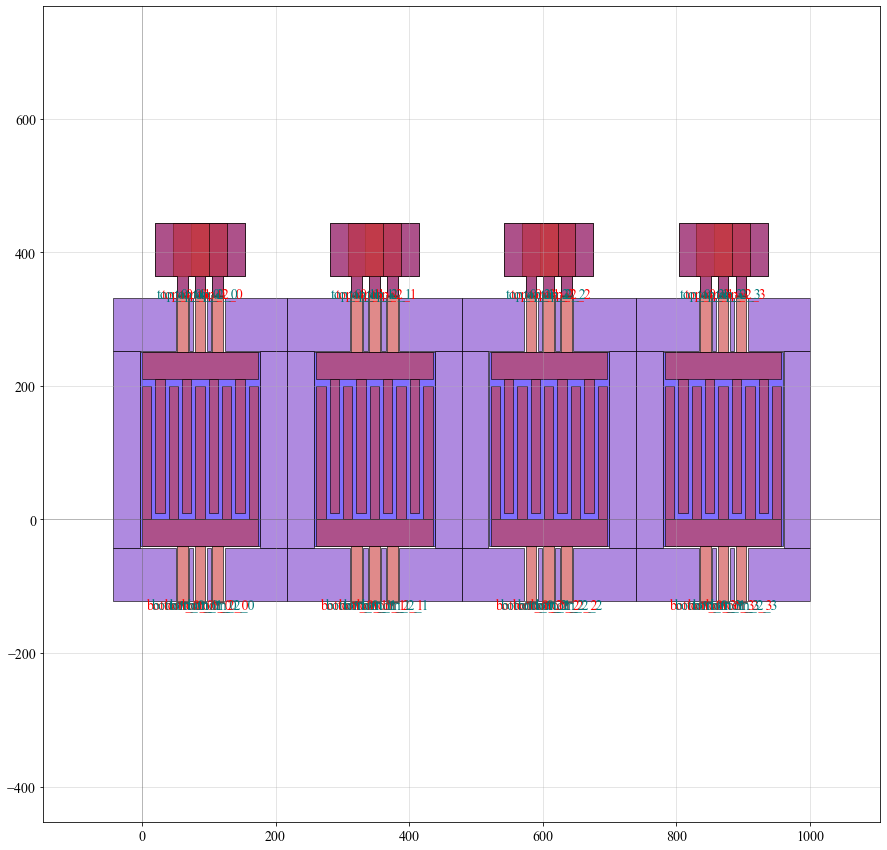

In [15]:
fberes_array=pm.addPad(pm.makeArray(pc.FBERes,4),pad=pc.ViaInPad,side='top')
fberes_array().view()

Look at this super-cool one, ```pm.addProbe```:

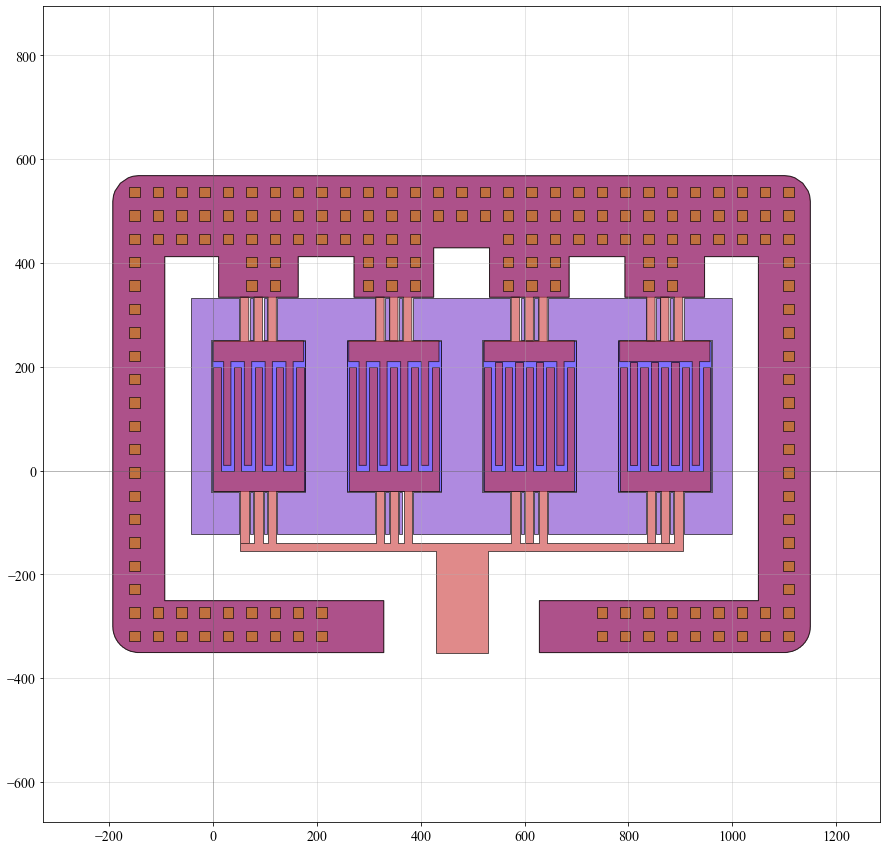

In [20]:
device_with_probe=pm.addOnePortProbe(pm.makeArray(pc.FBERes,4),pc.GSGProbe)()

import pirel.tools as pt

pt.check(device_with_probe.draw(),joined=True)
